In [322]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np 
import pandas as pd

In [323]:
df=pd.read_csv(r"C:\Users\GIRIRAJ ROY\Downloads\cStick.csv")

In [324]:
df.head()


,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0


In [325]:
df.shape


(2039, 7)

In [326]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distance       2039 non-null   float64
 1   Pressure       2039 non-null   float64
 2   HRV            2039 non-null   float64
 3   Sugar level    2039 non-null   float64
 4   SpO2           2039 non-null   float64
 5   Accelerometer  2039 non-null   float64
 6   Decision       2039 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 111.6 KB


In [327]:
df.duplicated().sum()

0

In [328]:
df1=df.copy()

In [329]:
df1.head()

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0


In [330]:
df['Accelerometer'].unique()

array([1., 0.])

In [331]:
df['Decision '].unique()

array([1, 2, 0], dtype=int64)

In [332]:
df1.drop(columns=['Sugar level'],inplace=True)

In [333]:
df1.head()


,Distance,Pressure,HRV,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,87.770,1.0,1
1,2.595,2.0,110.190,65.190,1.0,2
2,68.067,0.0,87.412,99.345,0.0,0
3,13.090,1.0,92.266,81.545,1.0,1
4,69.430,0.0,89.480,99.990,0.0,0


In [334]:
x=df1.drop(columns=['Decision '])

In [335]:
x

,Distance,Pressure,HRV,SpO2,Accelerometer
0,25.540,1.0,101.396,87.770,1.0
1,2.595,2.0,110.190,65.190,1.0
2,68.067,0.0,87.412,99.345,0.0
3,13.090,1.0,92.266,81.545,1.0
4,69.430,0.0,89.480,99.990,0.0
...,...,...,...,...,...
2034,5.655,2.0,116.310,71.310,1.0
2035,9.660,2.0,124.320,79.320,1.0
2036,15.220,1.0,93.828,82.610,1.0
2037,9.120,2.0,123.240,78.240,1.0


In [336]:
y=df1[['Decision ']]

In [337]:
y.head()

,Decision
0,1
1,2
2,0
3,1
4,0


In [338]:
from sklearn.model_selection import train_test_split

In [339]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [340]:
x_train.head()

,Distance,Pressure,HRV,SpO2,Accelerometer
890,67.864,0.0,87.104,99.24,0.0
1675,5.370,2.0,115.740,70.74,1.0
948,3.105,2.0,111.210,66.21,1.0
802,62.354,0.0,78.744,96.39,0.0
140,4.155,2.0,113.310,68.31,1.0


In [341]:
x_test.head()

,Distance,Pressure,HRV,SpO2,Accelerometer
316,57.772,0.0,71.792,94.020,0.0
111,8.700,2.0,122.400,77.400,1.0
1445,67.980,0.0,87.280,99.300,0.0
776,61.832,0.0,77.952,96.120,0.0
864,29.050,1.0,103.970,89.525,1.0


In [342]:
y_train.head()

,Decision
890,0
1675,2
948,2
802,0
140,2


In [343]:
y_test.head()

,Decision
316,0
111,2
1445,0
776,0
864,1


In [344]:
x_train.shape


(1631, 5)

In [345]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [346]:
y_train.shape

(1631, 1)

In [347]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)


In [348]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y_test_scaled = scaler.fit_transform(y_test)

In [349]:
x_train_scaled.shape

(1631, 5)

In [350]:
y_train_scaled[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [351]:
x_train_scaled

array([[0.96974893, 0.        , 0.41711296, 0.98124531, 0.        ],
       [0.07673511, 1.        , 0.8578024 , 0.26856714, 1.        ],
       [0.04436919, 1.        , 0.78808864, 0.15528882, 1.        ],
       ...,
       [0.93576828, 0.        , 0.36158818, 0.95048762, 0.        ],
       [0.89474286, 0.        , 0.29455217, 0.91335334, 0.        ],
       [0.3263743 , 0.5       , 0.60658664, 0.66066517, 1.        ]])

In [352]:
model=Sequential()

model.add(Dense(64,input_dim=5,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))


C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [353]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [354]:
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,043 (11.89 KB)

 Trainable params: 3,043 (11.89 KB)

 Non-trainable params: 0 (0.00 B)

In [355]:

history = model.fit(x_train_scaled, y_train, epochs=70)


Epoch 1/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5551 - loss: 0.9817   
Epoch 2/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.9868 - loss: 0.4589
Epoch 3/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 1.0000 - loss: 0.0633
Epoch 4/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 1.0000 - loss: 0.0159
Epoch 5/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 1.0000 - loss: 0.0075
Epoch 6/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 1.0000 - loss: 0.0042
Epoch 7/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 1.0000 - loss: 0.0027
Epoch 8/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 1.0000 - loss: 0.0019
Epoch 9/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 1.0000 - loss: 0.0015
Epoch 10/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 1.0000 - loss: 0.0011
Epoch 11/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 1.0000 - loss: 9.3685e-04
Epoch 12/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 633us

In [356]:

test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')



13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.2646e-05 
Test Accuracy: 1.0


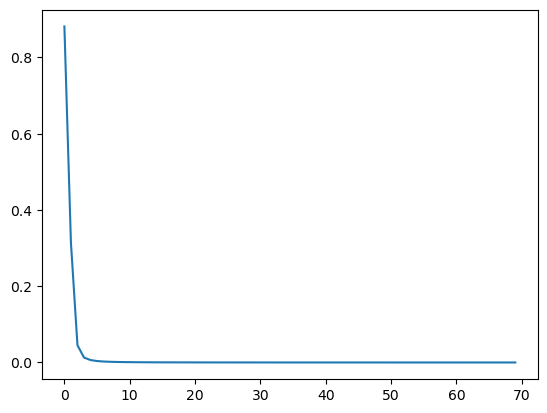

In [357]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])

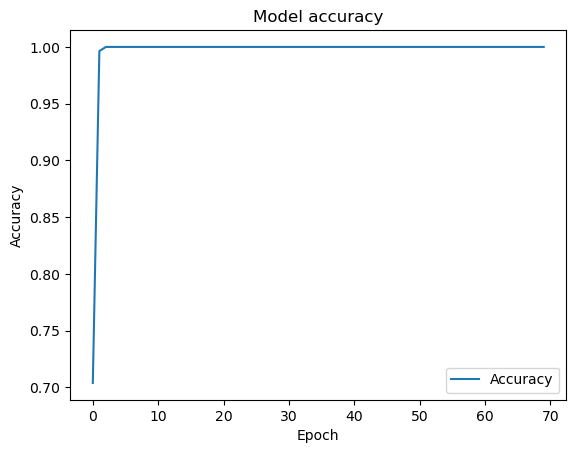

In [358]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='lower right')
plt.show()


In [359]:
y_pred=model.predict(x_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [360]:
y_train.head()

,Decision
890,0
1675,2
948,2
802,0
140,2


In [361]:
y_pred[:20]

array([[9.9999285e-01, 7.0898841e-06, 1.0563402e-07],
       [1.4089152e-07, 2.4131796e-05, 9.9997580e-01],
       [9.9999785e-01, 2.1605388e-06, 2.1137669e-08],
       [9.9999559e-01, 4.3712880e-06, 5.5409128e-08],
       [5.4080219e-06, 9.9999356e-01, 1.0625309e-06],
       [2.8276586e-06, 9.9999464e-01, 2.5767004e-06],
       [5.6158319e-06, 9.9999332e-01, 1.0350180e-06],
       [1.1360618e-07, 7.4184777e-06, 9.9999249e-01],
       [1.9242876e-07, 4.7180070e-05, 9.9995255e-01],
       [9.9999666e-01, 3.3706458e-06, 3.9110656e-08],
       [1.1342775e-07, 7.4595609e-06, 9.9999237e-01],
       [1.1827295e-07, 6.6545545e-06, 9.9999321e-01],
       [1.7840557e-07, 4.0876603e-05, 9.9995899e-01],
       [2.6975399e-06, 9.9999368e-01, 3.5941089e-06],
       [9.9998605e-01, 1.3657066e-05, 2.2744949e-07],
       [1.1749094e-07, 6.7436495e-06, 9.9999309e-01],
       [1.4985866e-07, 2.8334682e-05, 9.9997151e-01],
       [2.9110765e-06, 9.9999487e-01, 2.2249374e-06],
       [9.9998963e-01, 1.029

In [362]:
y_test.head(20)

,Decision
316,0
111,2
1445,0
776,0
864,1
1492,1
1716,1
1074,2
1204,2
28,0


In [363]:
x_train_scaled[:10]

array([[0.96974893, 0.        , 0.41711296, 0.98124531, 0.        ],
       [0.07673511, 1.        , 0.8578024 , 0.26856714, 1.        ],
       [0.04436919, 1.        , 0.78808864, 0.15528882, 1.        ],
       [0.89101328, 0.        , 0.28845799, 0.90997749, 0.        ],
       [0.05937326, 1.        , 0.82040628, 0.20780195, 1.        ],
       [0.13225018, 1.        , 0.97737765, 0.46286572, 1.        ],
       [0.05294294, 1.        , 0.80655586, 0.18529632, 1.        ],
       [0.02872208, 1.        , 0.75438596, 0.10052513, 1.        ],
       [0.0527286 , 1.        , 0.80609418, 0.18454614, 1.        ],
       [0.13910919, 1.        , 0.99215143, 0.48687172, 1.        ]])

In [364]:
x_train[:10]

,Distance,Pressure,HRV,SpO2,Accelerometer
890,67.864,0.0,87.104,99.24,0.0
1675,5.370,2.0,115.740,70.74,1.0
948,3.105,2.0,111.210,66.21,1.0
802,62.354,0.0,78.744,96.39,0.0
140,4.155,2.0,113.310,68.31,1.0
1028,9.255,2.0,123.510,78.51,1.0
1613,3.705,2.0,112.410,67.41,1.0
1390,2.010,2.0,109.020,64.02,1.0
1079,3.690,2.0,112.380,67.38,1.0
1060,9.735,2.0,124.470,79.47,1.0


In [365]:
import numpy as np

def convert_to_class(y_pred):
  max_indices = np.argmax(y_pred, axis=1)
  return max_indices


In [366]:
y_true = convert_to_class(y_pred)
print(y_true)

[0 2 0 0 1 1 1 2 2 0 2 2 2 1 0 2 2 1 0 1 2 0 2 2 2 0 1 0 1 2 1 2 2 0 1 1 2
 2 0 1 2 2 2 0 0 1 1 1 2 0 0 2 1 1 1 2 1 2 0 1 2 0 0 1 0 2 0 0 0 1 2 2 0 1
 2 0 1 1 2 1 1 0 0 2 2 1 1 1 2 0 1 0 1 1 2 1 2 0 1 0 0 1 2 1 2 0 2 1 2 1 0
 0 1 2 1 1 0 0 2 2 1 1 2 2 1 1 2 1 2 0 1 0 0 0 2 1 2 2 0 0 1 1 0 0 0 1 0 0
 1 2 0 2 2 2 1 0 1 1 0 1 2 2 2 2 2 0 2 0 1 2 1 1 2 0 1 2 0 0 2 0 1 0 1 2 1
 1 1 0 1 1 1 0 1 1 0 2 0 0 2 0 0 2 0 1 0 2 2 1 2 0 1 1 2 0 1 1 2 2 0 2 1 2
 2 2 0 0 0 1 1 0 2 2 2 0 2 0 0 2 2 1 0 2 0 0 1 1 1 1 1 1 2 0 1 2 2 0 0 0 0
 1 2 0 1 2 1 2 0 2 2 1 2 2 0 1 0 2 1 2 0 2 0 2 1 2 1 2 2 2 1 2 2 1 0 0 0 1
 1 1 1 2 0 0 1 1 0 1 1 1 1 2 2 2 2 1 2 2 1 0 1 2 2 0 1 0 0 2 2 2 1 1 1 0 1
 1 1 1 2 2 2 0 2 0 1 2 2 0 2 0 2 2 2 2 2 0 0 2 0 2 1 1 0 1 0 0 1 2 0 2 2 1
 0 2 1 2 0 1 2 0 1 1 0 1 1 2 0 1 2 1 2 1 2 0 2 0 2 0 0 1 1 1 2 2 2 0 1 2 2
 2]


In [367]:
y_test[:31]

,Decision
316,0
111,2
1445,0
776,0
864,1
1492,1
1716,1
1074,2
1204,2
28,0


In [368]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_true)

1.0

In [376]:
import pickle


In [380]:
model

<Sequential name=sequential_8, built=True>

In [397]:
history

In [396]:
pip list

Package                       Version
----------------------------- ------------------
absl-py                       2.1.0
aiobotocore                   2.12.3
aiofiles                      22.1.0
aiohttp                       3.9.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.16
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.5.1
anaconda-navigator            2.5.0
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         4.2.0
appdirs                       1.4.4
archspec                      0.2.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       6.1.0
astropy-iers-data             0.2024.6.3.0.31.14
asttokens                  